In [1]:
import pandas as pd
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df.columns

C:\Users\chand\AppData\Local\Temp\ipykernel_22192\2449371239.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [2]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['loan_status'].value_counts(dropna=False)


loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: count, dtype: int64

In [4]:
df = df.dropna(subset=['loan_status'])

Mapping the labels to 0 and 1


In [5]:
mapping = {
    'Fully Paid': 0, 'Charged Off': 1, 'Default': 1, 
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'In Grace Period': 0, 'Current': 0, 
    'Late (31-120 days)': 1, 'Late (16-30 days)': 1, 
    'Does not meet the credit policy. Status:Charged Off': 1
}

print("\nBinary mapping:")
print("  0: Paid (Fully Paid, Policy-Fully Paid, Grace period, Current)")
print("  1: Default (Charged Off, Default, Late, Policy-Charged Off)")

df['loan_status'] = df['loan_status'].map(mapping).astype(int)

# Class distribution
class_dist = df['loan_status'].value_counts().sort_index()

print(f"\nClass distribution:")
for cls, count in class_dist.items():
    label = "Paid" if cls == 0 else "Default"
    print(f"  {cls} ({label}): {count:,} ({count/len(df)*100:.1f}%)")


Binary mapping:
  0: Paid (Fully Paid, Policy-Fully Paid, Grace period, Current)
  1: Default (Charged Off, Default, Late, Policy-Charged Off)

Class distribution:
  0 (Paid): 1,965,492 (86.9%)
  1 (Default): 295,176 (13.1%)


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.0000,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.0000,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.0000,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.9900,30.99
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,10917.0,11636.883942,7625.988281,55.73,5627.00,10028.39,16151.8900,40306.41
hardship_last_payment_amount,10917.0,193.994321,198.629496,0.01,44.44,133.16,284.1900,1407.86
settlement_amount,34246.0,5010.664267,3693.122590,44.21,2208.00,4146.11,6850.1725,33601.00
settlement_percentage,34246.0,47.780365,7.311822,0.20,45.00,45.00,50.0000,521.35


In [7]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)
missing_fractions

member_id                                     1.000000
orig_projected_additional_accrued_interest    0.996173
hardship_end_date                             0.995171
hardship_start_date                           0.995171
hardship_type                                 0.995171
                                                ...   
policy_code                                   0.000000
revol_bal                                     0.000000
fico_range_high                               0.000000
fico_range_low                                0.000000
id                                            0.000000
Length: 151, dtype: float64

Text(0, 0.5, 'Feature count')

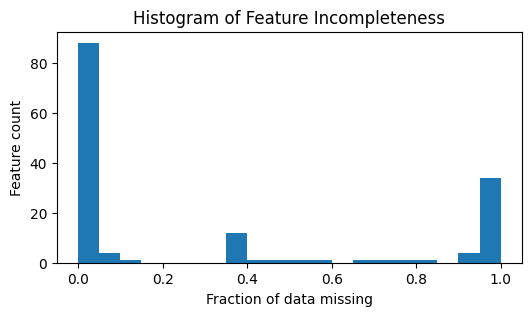

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

Removing the columns that consists of more than 40% null values


In [9]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.4].index))
len(drop_list)

46

In [10]:
df1 = df.copy()
df1.drop(labels=drop_list, axis=1, inplace=True)

In [11]:
df1.shape

(2260668, 105)

In [12]:
print(df1.isnull().sum()[df1.isnull().sum() > 0])

emp_title                     166969
emp_length                    146907
annual_inc                         4
title                          23326
zip_code                           1
                               ...  
tax_liens                        105
tot_hi_cred_lim                70276
total_bal_ex_mort              50030
total_bc_limit                 50030
total_il_high_credit_limit     70276
Length: 67, dtype: int64


Preprocessing of the categorical columns 

In [13]:
df1.select_dtypes(include=['object']).T

,0,1,2,3,4,5,6,7,8,9,...,2260689,2260690,2260691,2260692,2260693,2260694,2260695,2260696,2260697,2260698
id,68407277,68355089,68341763,66310712,68476807,68426831,68476668,67275481,68466926,68616873,...,88979824,88948836,89996426,90006534,89955820,89885898,88977788,88985880,88224441,88215728
term,36 months,36 months,60 months,60 months,60 months,36 months,36 months,36 months,36 months,36 months,...,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months
grade,C,C,B,C,F,C,B,B,A,B,...,B,C,C,C,B,C,B,B,C,C
sub_grade,C4,C1,B4,C5,F1,C3,B2,B1,A2,B5,...,B3,C3,C4,C1,B3,C1,B3,B3,C4,C4
emp_title,leadman,Engineer,truck driver,Information Systems Officer,Contract Specialist,Veterinary Tecnician,Vice President of Recruiting Operations,road driver,SERVICE MANAGER,Vendor liaison,...,Financial Advisor,Chief Operating Officer,Sales Manager,Manager,Current Operations Officer,Unit Operator,Database Administrator,Vice President,Program Manager,Customer Service Technician
emp_length,10+ years,10+ years,10+ years,10+ years,3 years,4 years,10+ years,10+ years,6 years,10+ years,...,5 years,9 years,3 years,10+ years,4 years,7 years,10+ years,9 years,6 years,10+ years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT,MORTGAGE,...,MORTGAGE,MORTGAGE,MORTGAGE,RENT,OWN,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified,Source Verified,Not Verified,Not Verified,Not Verified,Not Verified,...,Verified,Not Verified,Source Verified,Not Verified,Not Verified,Source Verified,Not Verified,Verified,Not Verified,Verified
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015,...,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016,Oct-2016
pymnt_plan,n,n,n,n,n,n,n,n,n,n,...,n,n,n,n,n,n,n,n,n,n


In [14]:
df1['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [15]:
#these fields do not contribute to model perfomance
columns_to_drop = {'title','zip_code', 'emp_title', 'url', 'id'}
df1.drop(columns_to_drop, axis = 1, inplace = True)

In [16]:
# Remove leading/trailing whitespaces from objects
df1 = df1.apply(lambda col: col.str.strip() if col.dtypes == 'object' else col)

# convert dates to 'datetime' types
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format='%b-%Y')
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], format='%b-%Y')
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], format='%b-%Y')
df1['last_credit_pull_d'] = pd.to_datetime(df1['last_credit_pull_d'], format='%b-%Y')


In [17]:
df1.select_dtypes(include=['object']).T

,0,1,2,3,4,5,6,7,8,9,...,2260689,2260690,2260691,2260692,2260693,2260694,2260695,2260696,2260697,2260698
term,36 months,36 months,60 months,60 months,60 months,36 months,36 months,36 months,36 months,36 months,...,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months,60 months
grade,C,C,B,C,F,C,B,B,A,B,...,B,C,C,C,B,C,B,B,C,C
sub_grade,C4,C1,B4,C5,F1,C3,B2,B1,A2,B5,...,B3,C3,C4,C1,B3,C1,B3,B3,C4,C4
emp_length,10+ years,10+ years,10+ years,10+ years,3 years,4 years,10+ years,10+ years,6 years,10+ years,...,5 years,9 years,3 years,10+ years,4 years,7 years,10+ years,9 years,6 years,10+ years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE,MORTGAGE,RENT,MORTGAGE,...,MORTGAGE,MORTGAGE,MORTGAGE,RENT,OWN,MORTGAGE,MORTGAGE,MORTGAGE,RENT,MORTGAGE
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified,Source Verified,Not Verified,Not Verified,Not Verified,Not Verified,...,Verified,Not Verified,Source Verified,Not Verified,Not Verified,Source Verified,Not Verified,Verified,Not Verified,Verified
pymnt_plan,n,n,n,n,n,n,n,n,n,n,...,n,n,n,n,n,n,n,n,n,n
purpose,debt_consolidation,small_business,home_improvement,debt_consolidation,major_purchase,debt_consolidation,debt_consolidation,major_purchase,credit_card,credit_card,...,debt_consolidation,debt_consolidation,home_improvement,medical,credit_card,home_improvement,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation
addr_state,PA,SD,IL,NJ,PA,GA,MN,SC,PA,RI,...,FL,CA,AZ,NC,HI,AL,UT,CA,FL,TX
initial_list_status,w,w,w,w,w,w,f,w,w,w,...,f,f,f,f,f,f,f,f,f,w


In [18]:
numerical_cols = df1.select_dtypes(exclude=['object', 'datetime']).drop('loan_status',axis=1).columns   #finding the numerical columns before encoding the categorical variables

In [19]:
df1['hardship_flag'].unique()

array(['N', 'Y'], dtype=object)

In [20]:
import numpy as np 
df1['debt_settlement_flag'] = np.where(df1['debt_settlement_flag'] == 'Y',1,0)
df1['hardship_flag'] = np.where(df1['hardship_flag'] == 'Y',1,0)
df1['pymnt_plan'] = np.where(df1['pymnt_plan'] == 'y',1,0)

In [21]:
df1['emp_length'] = df1['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})
df1['emp_length'] = df1['emp_length'].str.extract('(\d+)').astype('float')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\chand\AppData\Local\Temp\ipykernel_22192\282327032.py:2: SyntaxWarning: invalid escape sequence '\d'
  df1['emp_length'] = df1['emp_length'].str.extract('(\d+)').astype('float')


In [22]:
df1['term'] = df1['term'].str.extract('(\d+)').fillna(0).astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\chand\AppData\Local\Temp\ipykernel_22192\998180517.py:1: SyntaxWarning: invalid escape sequence '\d'
  df1['term'] = df1['term'].str.extract('(\d+)').fillna(0).astype(int)


In [23]:
def get_sorted_unique_counts(df):
    object_cols = df.select_dtypes(include=['object', 'category']).columns
    object_nunique = {col: df[col].nunique() for col in object_cols}
    unique_counts = pd.DataFrame(list(object_nunique.items()), columns=['Column', 'Unique Count'])
    unique_counts = unique_counts.sort_values(by='Unique Count').reset_index(drop=True)
    
    return unique_counts


unique_counts = get_sorted_unique_counts(df1)

print(unique_counts)


                Column  Unique Count
0  initial_list_status             2
1     application_type             2
2  disbursement_method             2
3  verification_status             3
4       home_ownership             6
5                grade             7
6              purpose            14
7            sub_grade            35
8           addr_state            51


In [24]:
#sub_grade is already hierarchically grouped via grade, so it may be redundant in modeling.
df1.drop('sub_grade', axis=1, inplace = True) 

In [25]:
df1['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [26]:
df1['home_ownership'] = df1['home_ownership'].replace({'ANY': 'OTHER', 'NONE': 'OTHER'})

In [27]:
df1.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:, 1]
# There appear to be large differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off.

home_ownership
MORTGAGE    0.113487
OTHER       0.098214
OWN         0.131006
RENT        0.151708
Name: proportion, dtype: float64

In [28]:
df1.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:, 1]

purpose
car                   0.099071
credit_card           0.106178
debt_consolidation    0.141112
educational           0.207547
home_improvement      0.115262
house                 0.129315
major_purchase        0.122371
medical               0.136569
moving                0.159060
other                 0.132114
renewable_energy      0.166090
small_business        0.205031
vacation              0.124380
wedding               0.123992
Name: proportion, dtype: float64

In [29]:
df1.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:, 1]

application_type
Individual    0.133714
Joint App     0.074841
Name: proportion, dtype: float64

In [30]:
df1.groupby('initial_list_status')['loan_status'].value_counts(normalize=True).loc[:, 1]

initial_list_status
f    0.160567
w    0.116403
Name: proportion, dtype: float64

In [31]:
df1.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:, :]

addr_state  loan_status
AK          0              0.868094
            1              0.131906
AL          0              0.842289
            1              0.157711
AR          0              0.845203
                             ...   
WI          1              0.122201
WV          0              0.903365
            1              0.096635
WY          0              0.888163
            1              0.111837
Name: proportion, Length: 102, dtype: float64

In [32]:
#One hot encoding 
df2 = pd.get_dummies(df1, columns=['grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method', 'pymnt_plan'], drop_first=True)

In [33]:
df2.shape

(2260668, 168)

Preprocessing of the numerical columns


In [34]:
numerical_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', '

In [35]:
fico_cols = [col for col in numerical_cols if 'fico' in col.lower()]
fico_cols

['fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low']

In [36]:
if fico_cols:    
    df2['fico_score'] = (df2['fico_range_low'] + df2['fico_range_high']) / 2
    df2['last_fico_score'] = (df2['last_fico_range_low'] + df2['last_fico_range_high']) / 2
     
else:
    # No FICO data
    df2['fico_score'] = 700  #(default value = 700 US average)
    df2['last_fico_score'] = 700  

In [37]:
remove_items = ['fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low']

numerical_cols = [x for x in numerical_cols if x not in remove_items]
numerical_cols.append('fico_score')
numerical_cols.append('last_fico_score')

In [38]:
missing_info = df2[numerical_cols].isnull().sum()
features_with_nulls = missing_info[missing_info > 0]

In [39]:
features_with_nulls

annual_inc                         4
dti                             1711
delinq_2yrs                       29
inq_last_6mths                    30
open_acc                          29
pub_rec                           29
revol_util                      1802
total_acc                         29
collections_12_mths_ex_med       145
acc_now_delinq                    29
tot_coll_amt                   70276
tot_cur_bal                    70276
open_acc_6m                   866130
open_act_il                   866129
open_il_12m                   866129
open_il_24m                   866129
total_bal_il                  866129
open_rv_12m                   866129
open_rv_24m                   866129
max_bal_bc                    866129
all_util                      866348
total_rev_hi_lim               70276
inq_fi                        866129
total_cu_tl                   866130
inq_last_12m                  866130
acc_open_past_24mths           50030
avg_cur_bal                    70346
b

In [40]:
#filling missing values with median 

for col in list(features_with_nulls.index):
    if df2[col].isnull().sum() > 0:
        median_val = df2[col].median()
        df2[col] = df2[col].fillna(median_val)

In [41]:
m = df2.isnull().sum()
m[m > 0]

emp_length            146907
earliest_cr_line          29
last_pymnt_d            2427
last_credit_pull_d        72
dtype: int64

In [42]:
mode_val = df2['emp_length'].mode()[0]
df2['emp_length'] = df2['emp_length'].fillna(mode_val)

In [43]:
df2 = df2.dropna(subset=['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'])

In [44]:
df2['annual_inc'].describe()

count    2.258141e+06
mean     7.799648e+04
std      1.127431e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [45]:
#performing Log transformation
df2['log_annual_inc'] = df2['annual_inc'].apply(lambda x: np.log10(x+1))
df2.drop('annual_inc', axis=1, inplace=True)
numerical_cols.remove('annual_inc')
numerical_cols.append('log_annual_inc')
df2['log_annual_inc'].describe()

count    2.258141e+06
mean     4.816141e+00
std      2.755607e-01
min      0.000000e+00
25%      4.662767e+00
50%      4.812920e+00
75%      4.968488e+00
max      8.041393e+00
Name: log_annual_inc, dtype: float64

In [46]:
df2['dti'].describe()

count    2.258141e+06
mean     1.882555e+01
std      1.417872e+01
min     -1.000000e+00
25%      1.190000e+01
50%      1.784000e+01
75%      2.449000e+01
max      9.990000e+02
Name: dti, dtype: float64

C:\Users\chand\AppData\Local\Temp\ipykernel_22192\2780578887.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.loc[df2['dti'].notnull() & (df2['dti']>=60), 'dti'], kde=False)


Text(0.5, 1.0, 'Debt-to-income Ratio')

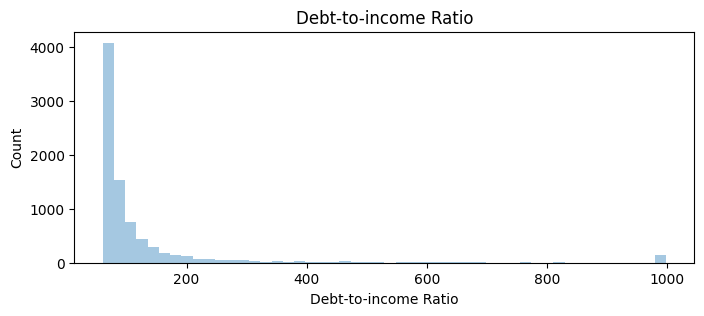

In [47]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.distplot(df2.loc[df2['dti'].notnull() & (df2['dti']>=60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

C:\Users\chand\AppData\Local\Temp\ipykernel_22192\1275590135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.loc[df2['dti'].notnull() & (df2['dti']<60), 'dti'], kde=False)


Text(0.5, 1.0, 'Debt-to-income Ratio')

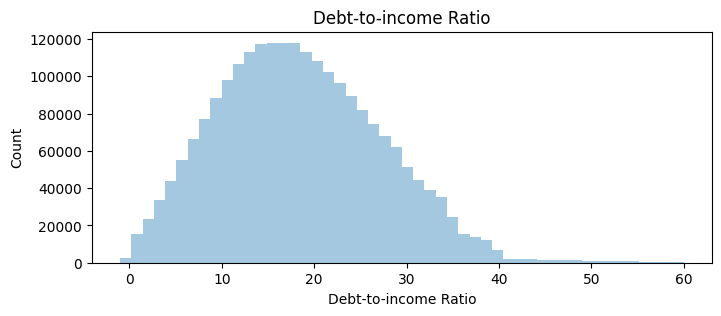

In [48]:
plt.figure(figsize=(8,3))
sns.distplot(df2.loc[df2['dti'].notnull() & (df2['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [49]:
(df2['dti']>=60).sum()

8302

In [50]:
#removing the outliers
df2 = df2[df2['dti'] < 60]

In [51]:
#converting the date columns to integer 
for col in df2.select_dtypes(include=['datetime', 'datetimetz']).columns:
    df2[col + '_year'] = df2[col].dt.year
    df2[col + '_month'] = df2[col].dt.month
    

In [52]:
df2.select_dtypes(include=['datetime'])

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2015-12-01,2003-08-01,2019-01-01,2019-03-01
1,2015-12-01,1999-12-01,2016-06-01,2019-03-01
2,2015-12-01,2000-08-01,2017-06-01,2019-03-01
3,2015-12-01,2008-09-01,2019-02-01,2019-03-01
4,2015-12-01,1998-06-01,2016-07-01,2018-03-01
...,...,...,...,...
2260694,2016-10-01,1999-12-01,2019-03-01,2019-03-01
2260695,2016-10-01,1991-02-01,2019-03-01,2019-03-01
2260696,2016-10-01,1995-02-01,2019-03-01,2019-03-01
2260697,2016-10-01,1999-07-01,2017-10-01,2019-03-01


In [53]:
df2 = df2.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)

In [54]:
final_df = df2.copy()

Train Test Split and Standardization

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = final_df['loan_status']
X = final_df.drop('loan_status', axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

ANN Model


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification (loan risk, churn, etc.)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


c:\Users\chand\anaconda3\envs\pytorch\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/25
 4310/39373 ━━━━━━━━━━━━━━━━━━━━ 33s 958us/step - accuracy: 0.8596 - loss: 3.4341

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

Test Accuracy: 0.9867
21093/21093 ━━━━━━━━━━━━━━━━━━━━ 9s 420us/step


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[586949    305]
 [  8685  79013]]
0.9461728217655794


In [ ]:

y_pred_proba = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='(AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()